# Redistributions

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import tensorcraft as tc
import matplotlib
import matplotlib.pyplot as plt
import logging
import shutil

tc.set_logger_config(level = logging.INFO)

In [ ]:
# LATEX_WIDTH = 517.935  # Doc
# LATEX_WIDTH = 444.14774 # Doc
LATEX_WIDTH = 370.28274 # Doc


default_figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=1, ratio=16/9)
fontsize = 8
fontsize_small = 8

matplotlib.rcParams.update(
    {
        "figure.figsize": default_figSize,
        "figure.dpi": 500,
        "figure.autolayout": True,
        "font.family": "serif",
        "font.size": fontsize,
        "axes.labelsize": fontsize_small,
        "legend.fontsize": fontsize_small,
        "xtick.labelsize": fontsize_small,
        "ytick.labelsize": fontsize_small,
    }
)
matplotlib.rcParams['text.usetex']= True if shutil.which('latex') else False

## Split

D_[2,2]⊥{0,∅}(4,∅)


Text(0.5, 0.98, '$T_{\\perp\\{ 0,\\emptyset \\}(4,\\emptyset)}$')

<Figure size 2561.8x1441.01 with 0 Axes>

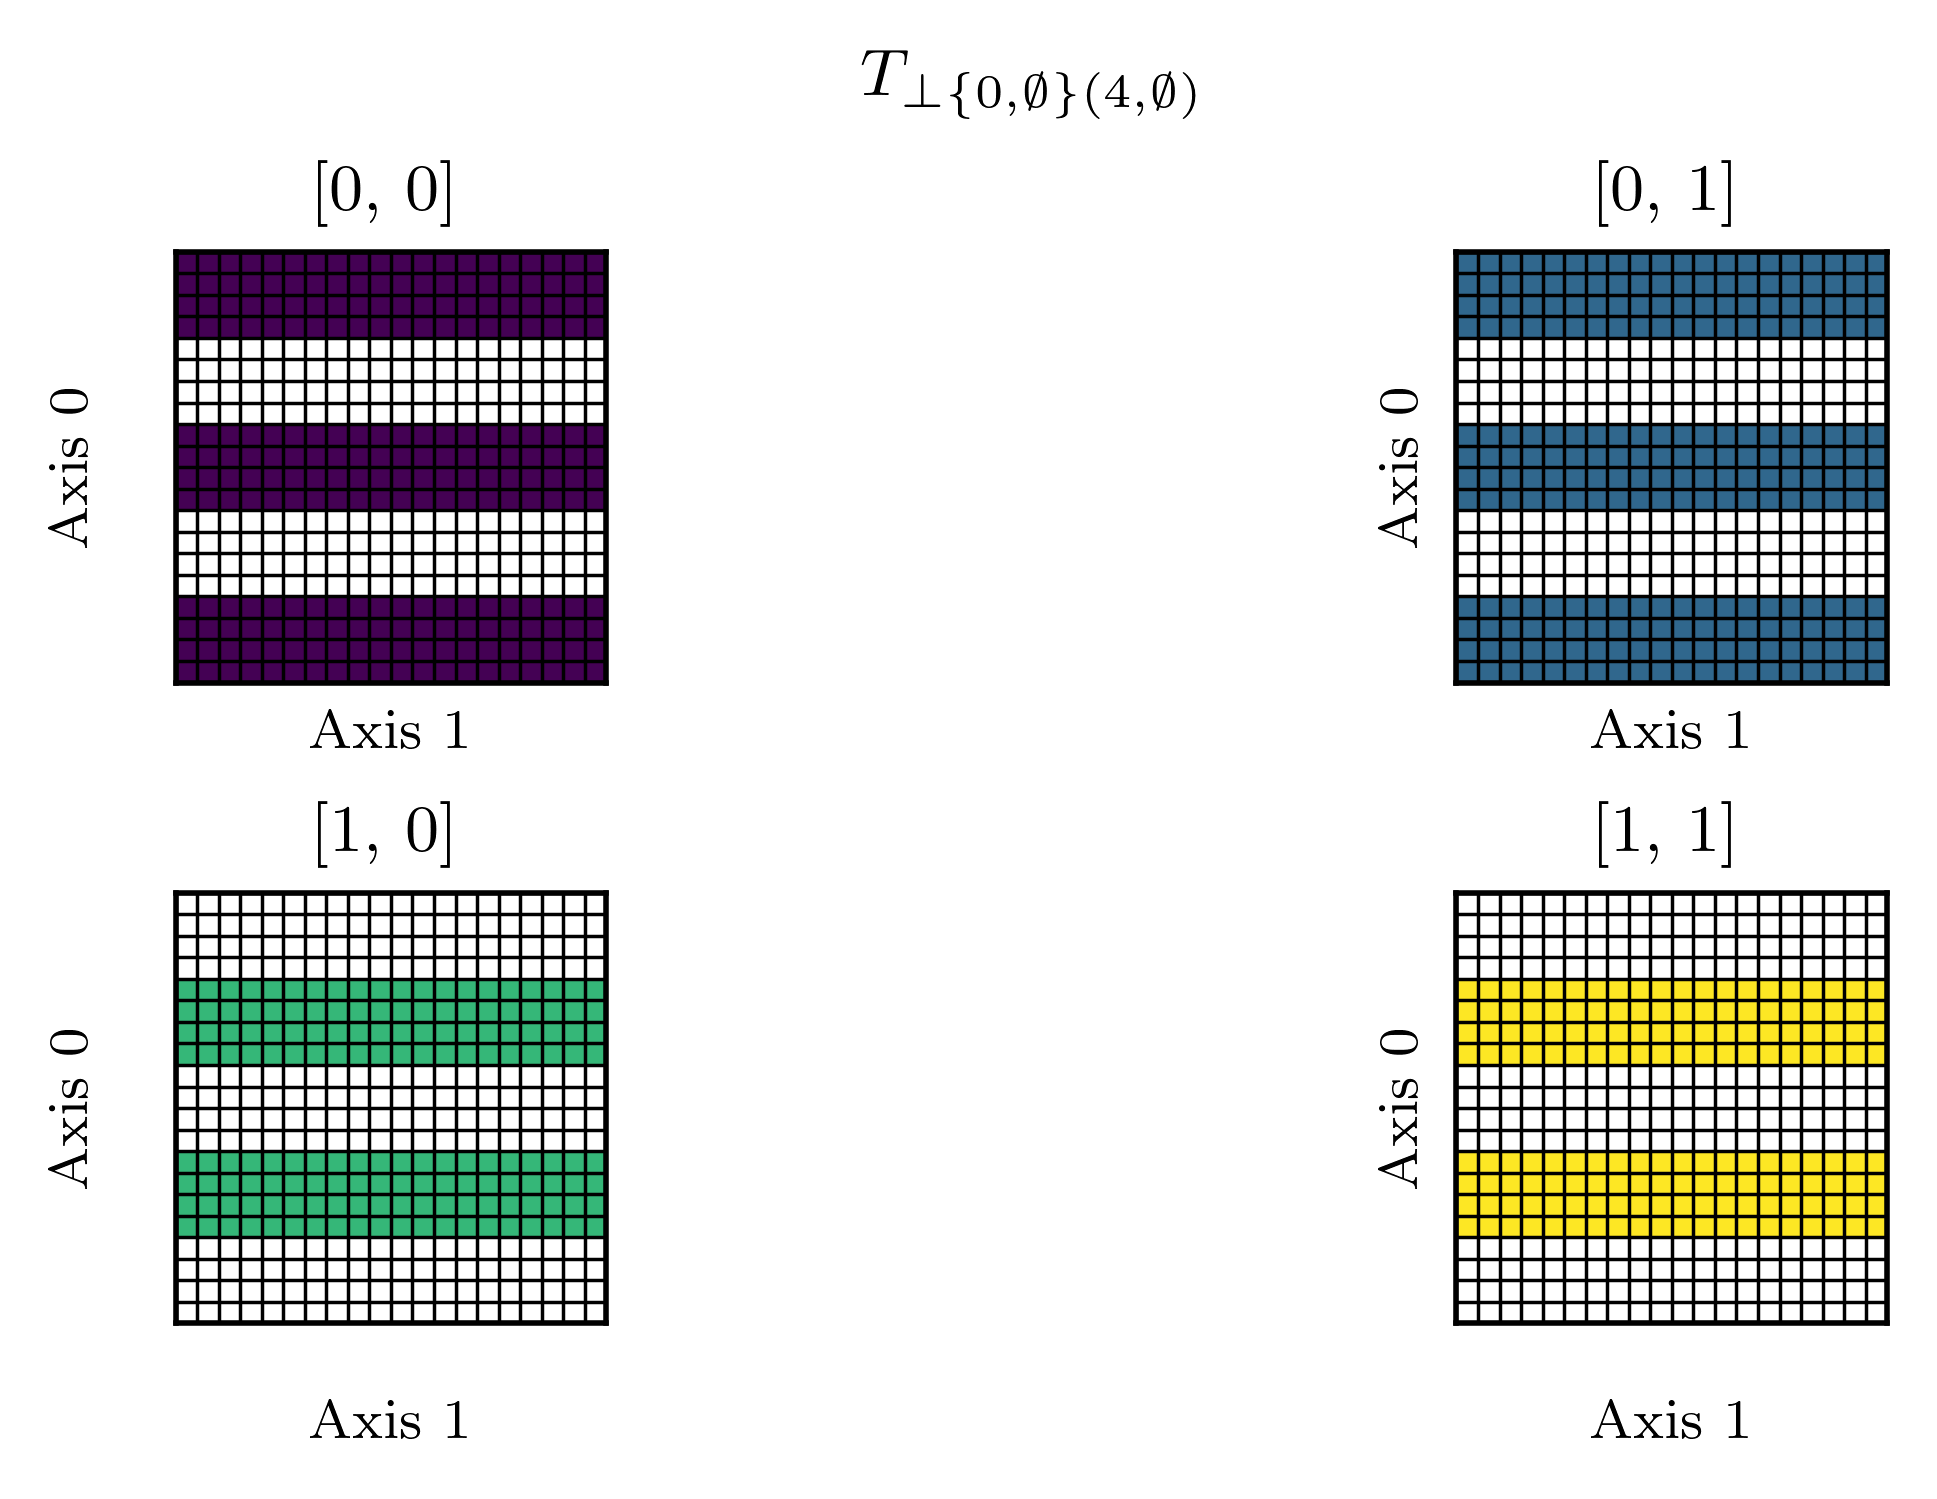

In [ ]:
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fig = plt.figure(layout='constrained')

tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 4)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)
fig.suptitle(dist.latexStr())
# plt.savefig("plots/split_example_start.pdf")

D_[2,2]⊥{(1,0),∅}(4,∅)
$T_{\perp\{ (1,0),\emptyset \}(4,\emptyset)}$
D_[2,2]⊥{(0,1),∅}(2,∅)
D_[2,2]⊥{0,1}(4,2)


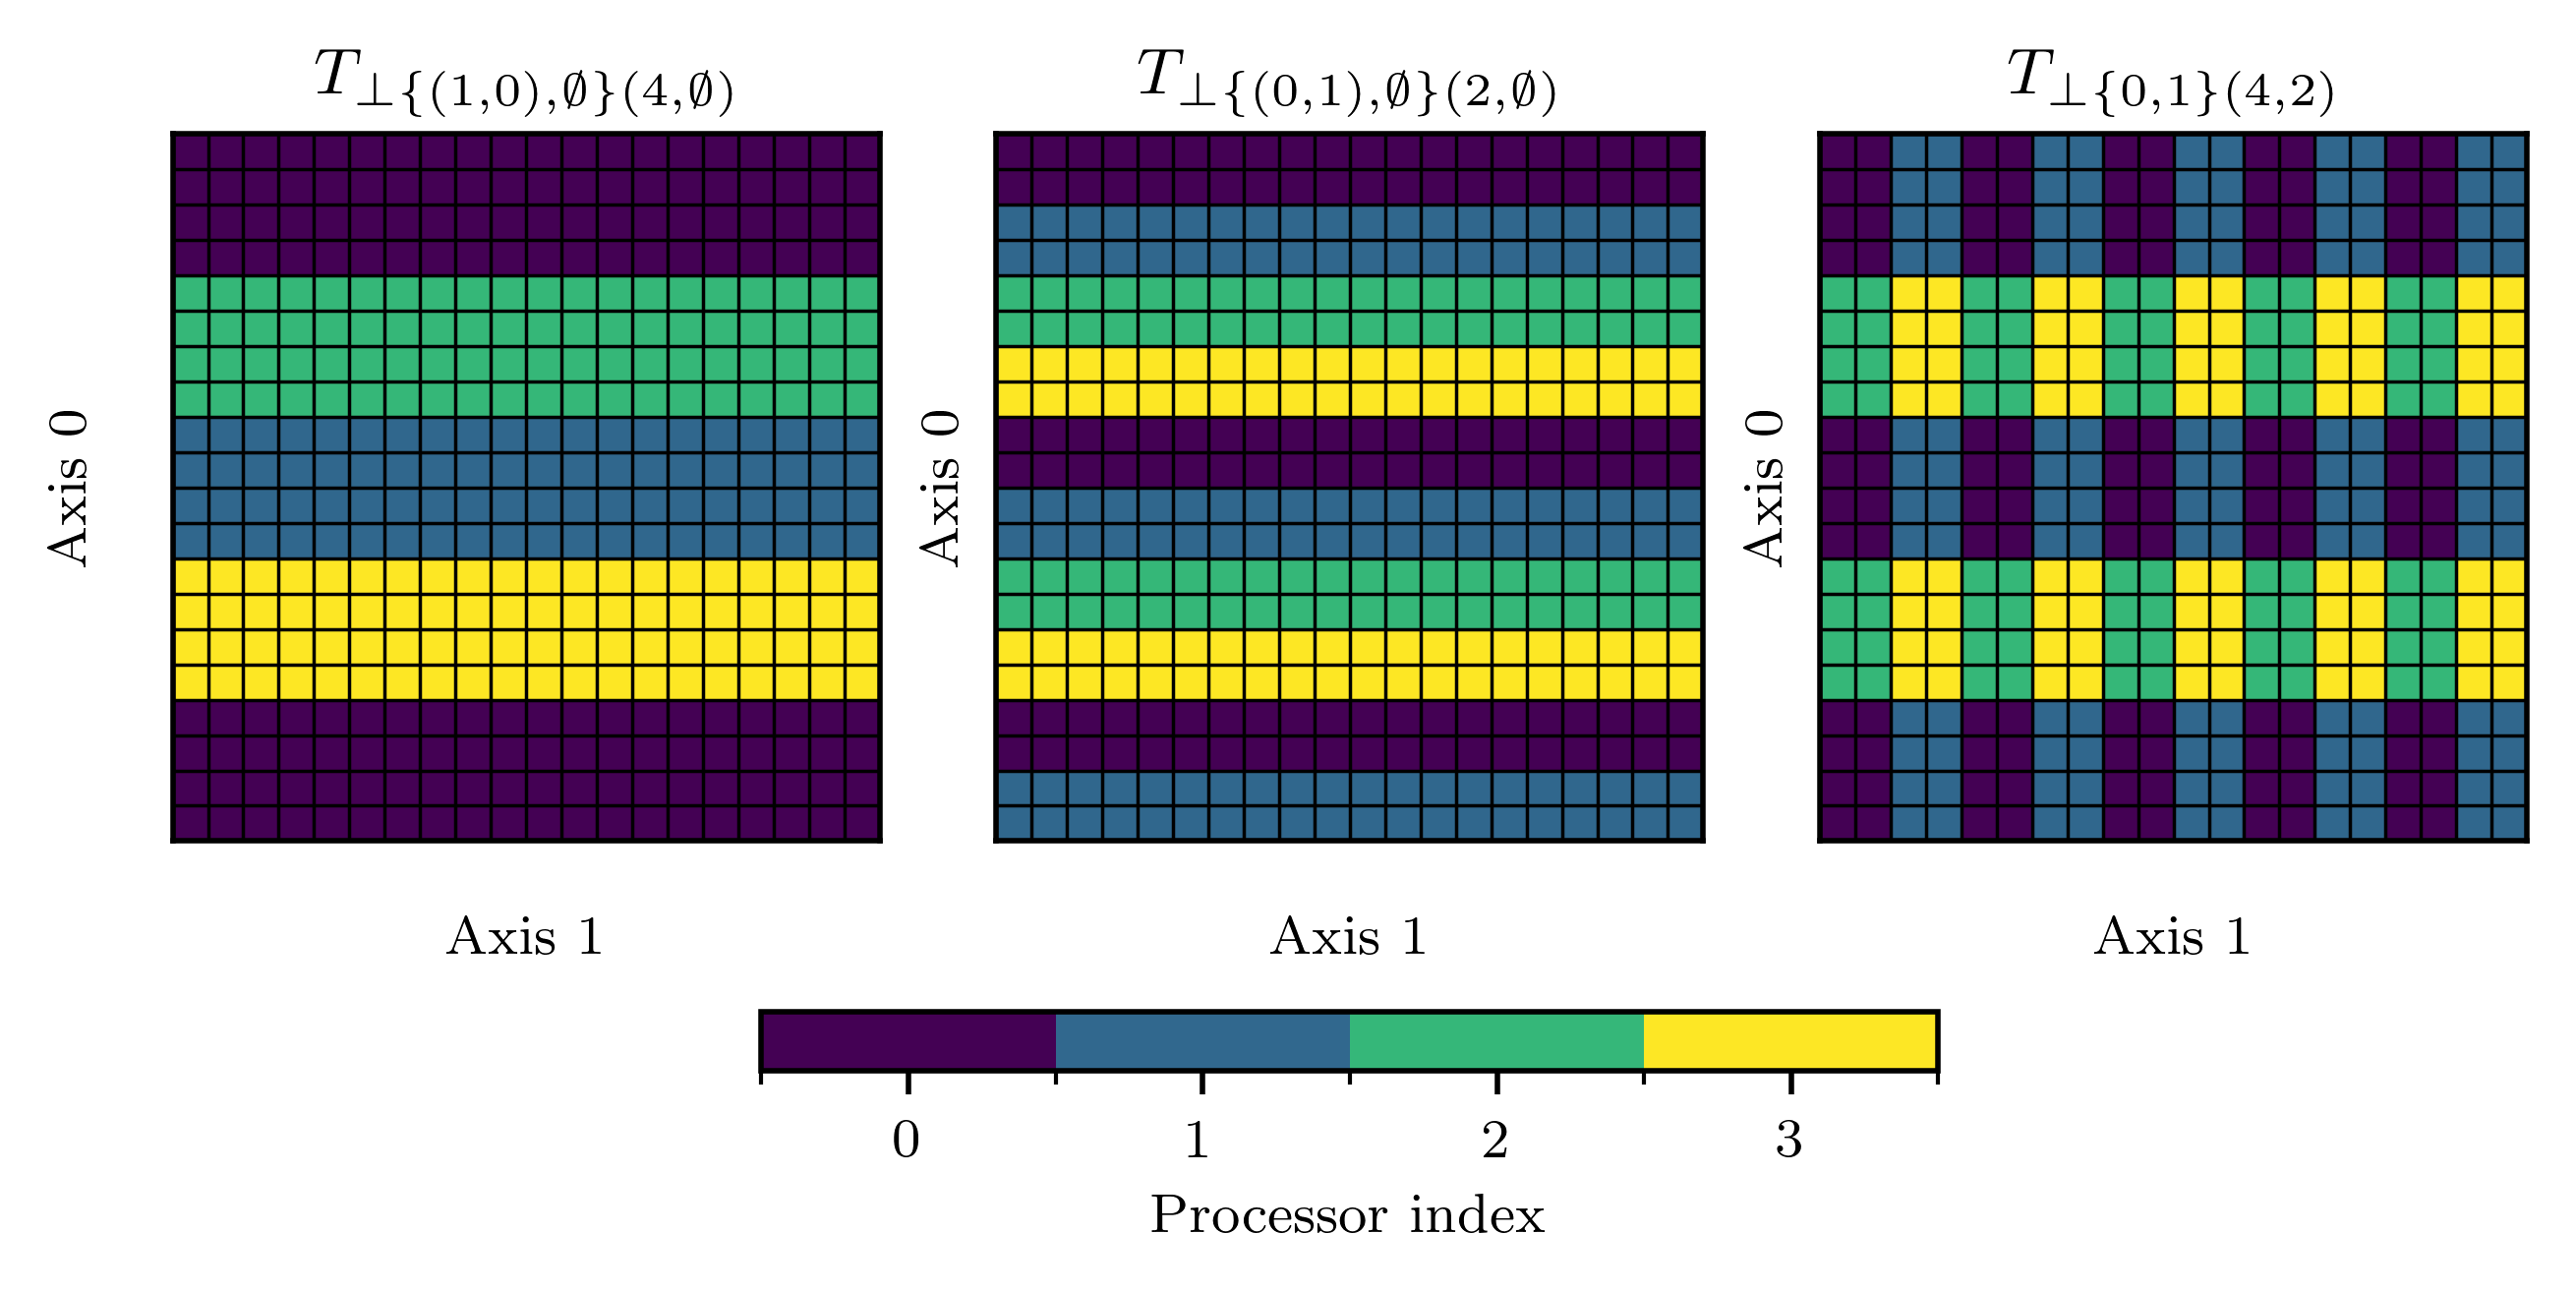

In [ ]:
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=1, ratio=2)
fig = plt.figure(figsize=figSize,layout="constrained")
grid = fig.add_gridspec(1,3)
axs = grid.subplots(
    sharey=True,
)

new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=0, mesh_dims=1, block_size=2)
print(new_dist)
tc.viz.draw_2d_tensor(axs[0], tensor_shape, new_dist, )
print(new_dist.latexStr())
axs[0].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=0, mesh_dims=1, block_size=2, minor=True)
print(new_dist)
tc.viz.draw_2d_tensor(axs[1], tensor_shape, new_dist, )
axs[1].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=1, mesh_dims=1, block_size=2)
print(new_dist)
tc.viz.draw_2d_tensor(axs[2], tensor_shape, new_dist, )
axs[2].set_title(new_dist.latexStr())

tc.viz.draw_color_bar(fig, axs, tc.viz.get_n_colors(dist.numProcessors), orientation="horizontal", shrink=0.5)

# plt.savefig("plots/split_example_end.pdf")

## AllGather

D_[2,2,2]⊥{(0,1),2}(1,1)


Text(0.5, 1.0, '$T_{\\perp\\{ (0,1),2 \\}(1,1)}$')

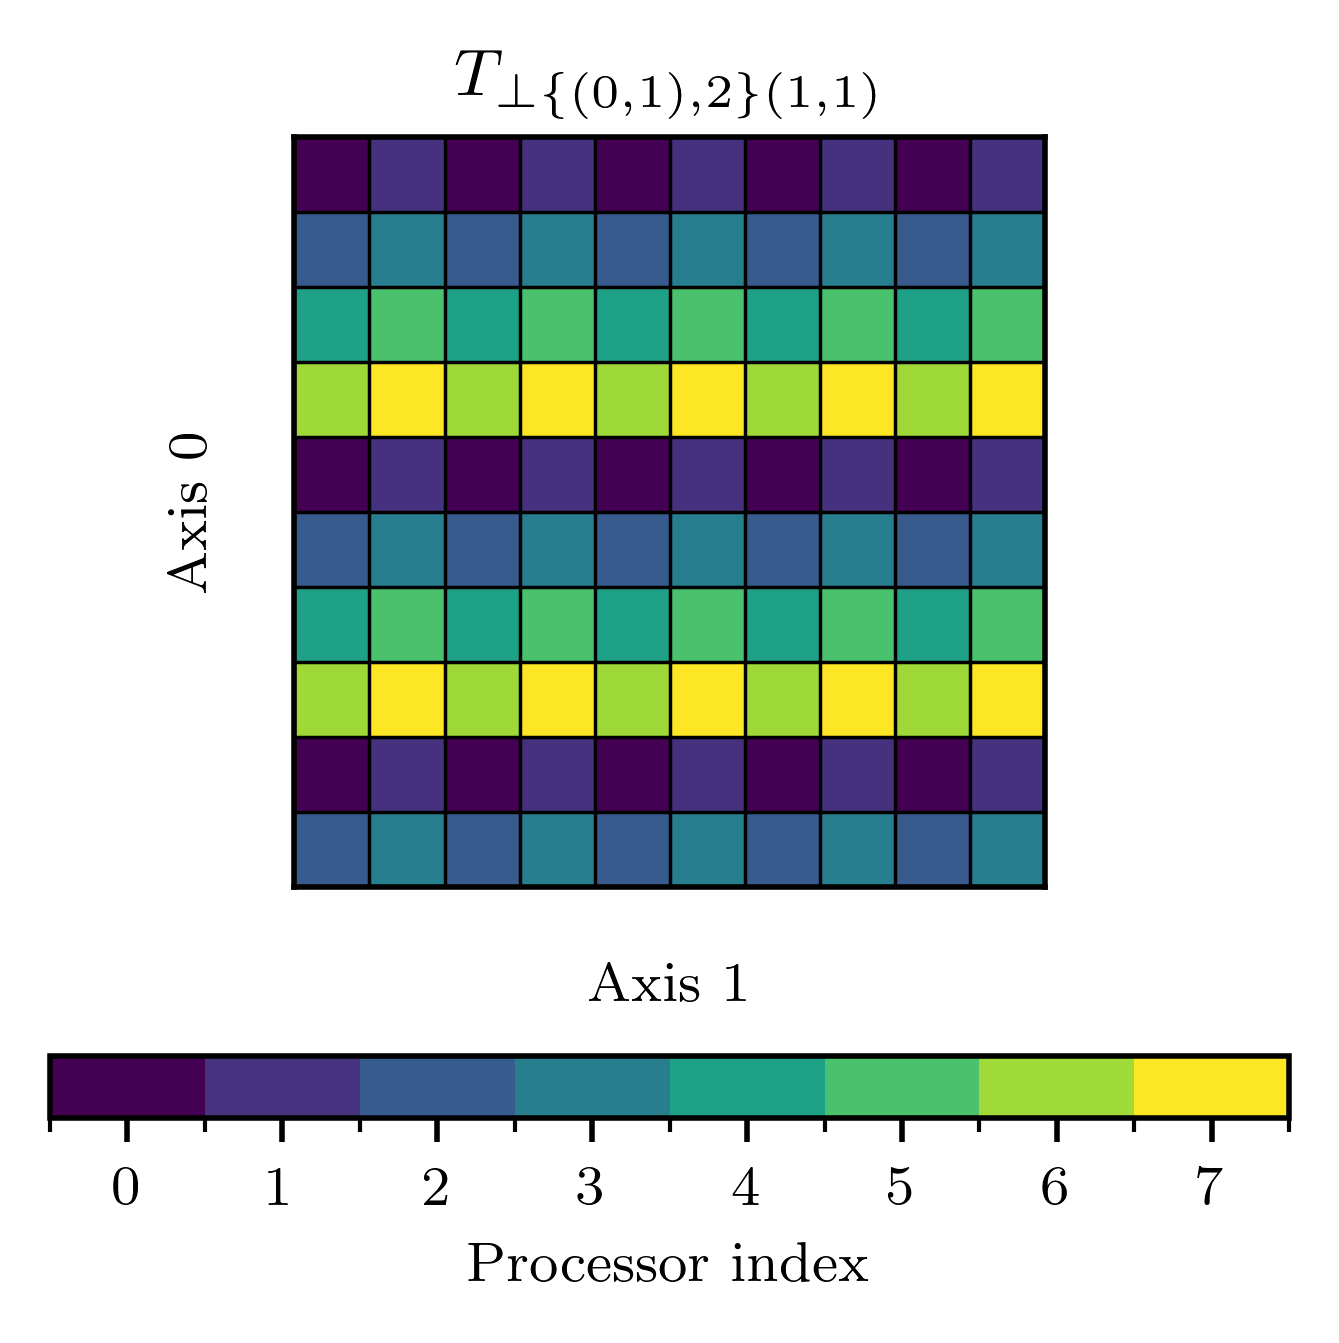

In [ ]:
tensor_shape = torch.Size([10, 10])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), 1)
print(dist)

figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fig = plt.figure(figsize=figSize, layout='constrained')
axs = fig.add_subplot(111)
tc.viz.draw_2d_tensor(axs, tensor_shape, dist, cbar=True)
axs.set_title(dist.latexStr())
# plt.savefig("plots/allgather_example_start.pdf")

### Mesh axis 0

In [ ]:
new_dist, comm_vol, n_procs = dist.allgather(tensor_shape, gather_mesh_dim=0)

figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fig = plt.figure(figsize=figSize,layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)
fig.suptitle(new_dist.latexStr())
# plt.savefig("plots/allgather_example_gather_0.pdf")

Text(0.5, 0.98, '$T_{\\perp\\{ 1,2 \\}(1,1)}$')

### Mesh Axis 1

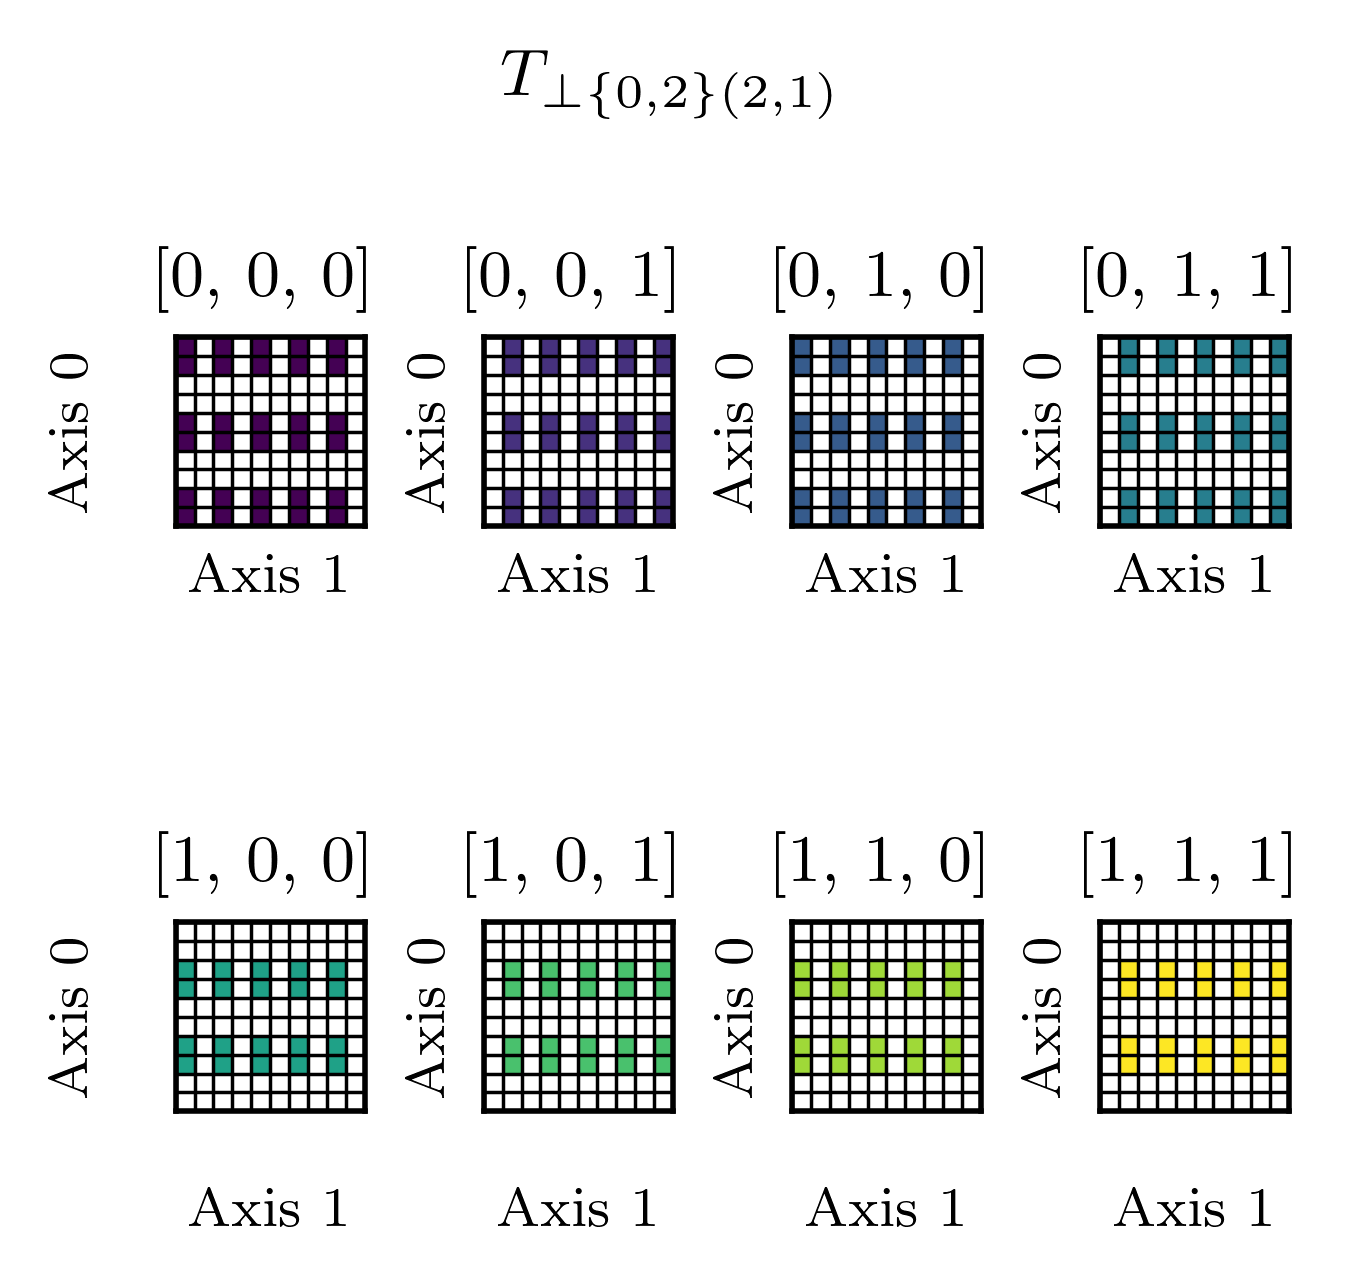

In [ ]:
new_dist, comm_vol, n_procs = dist.allgather(tensor_shape, gather_mesh_dim=1)

figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fig = plt.figure(figsize=figSize,layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)
fig.suptitle(new_dist.latexStr())
# plt.savefig("plots/allgather_example_gather_1.pdf")

### Mesh Axis 2

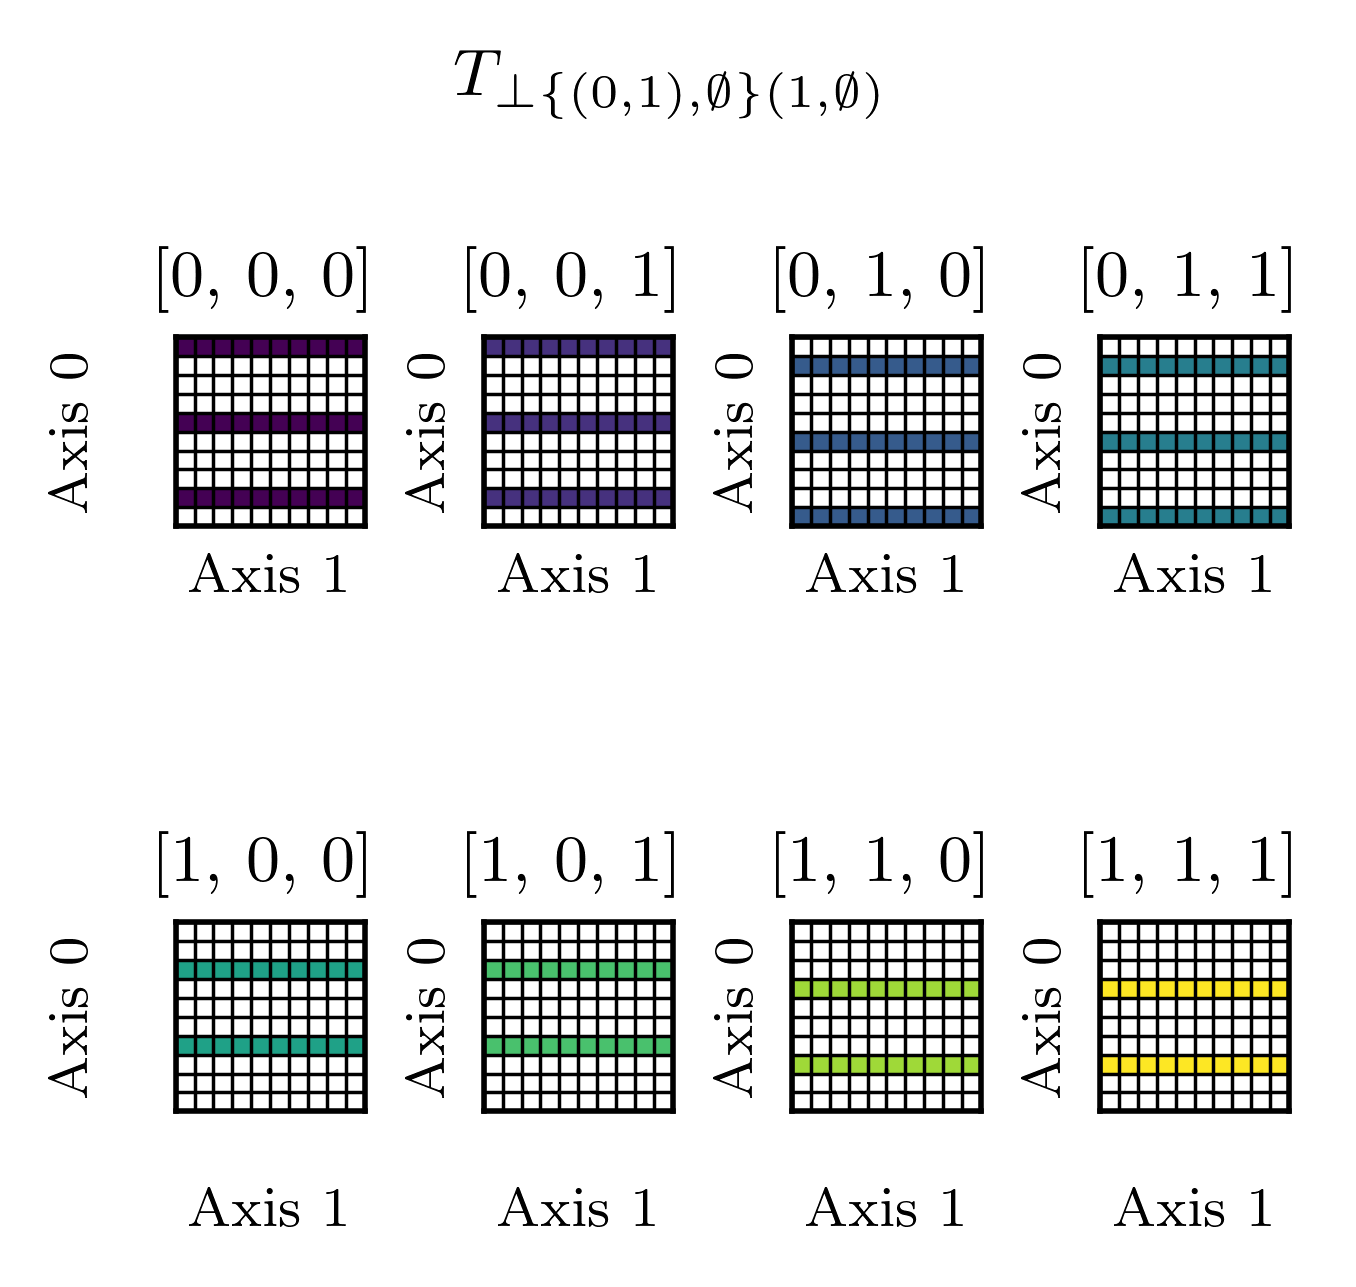

In [ ]:
new_dist, comm_vol, n_procs = dist.allgather(tensor_shape, gather_mesh_dim=2)

figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fig = plt.figure(figsize=figSize,layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)
fig.suptitle(new_dist.latexStr())
# plt.savefig("plots/allgather_example_gather_2.pdf")

## All2All

D_[2,2,2]⊥{(0,2),1}(4,4)


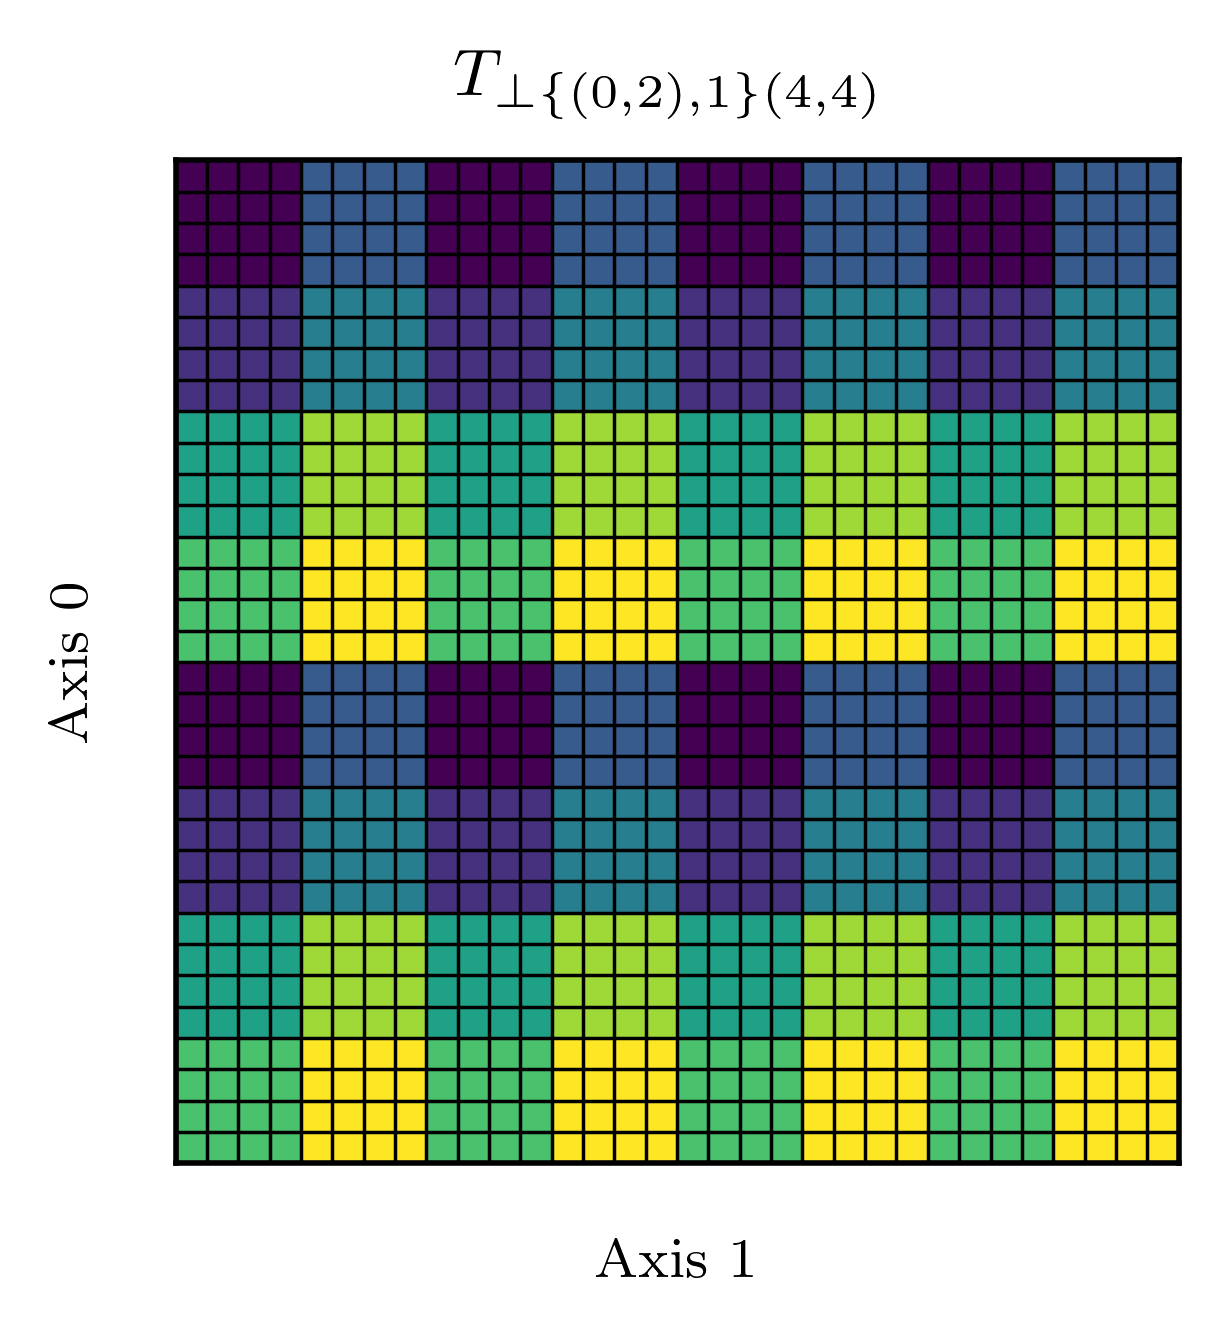

In [ ]:
tensor_shape = torch.Size([32, 32])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,2), (1,)), 4)
print(dist)
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fig = plt.figure(figsize=figSize,layout='constrained')
axs = fig.add_subplot(111)
fig.suptitle(dist.latexStr())
tc.viz.draw_2d_tensor(axs, tensor_shape, dist, cbar=True)
# plt.savefig("plots/alltoall_example_start.pdf")

D_[2,2,2]⊥{∅,(0,2,1)}(∅,4)
D_[2,2,2]⊥{0,(1,2)}(8,2)
D_[2,2,2]⊥{(1,0,2),∅}(4,∅)


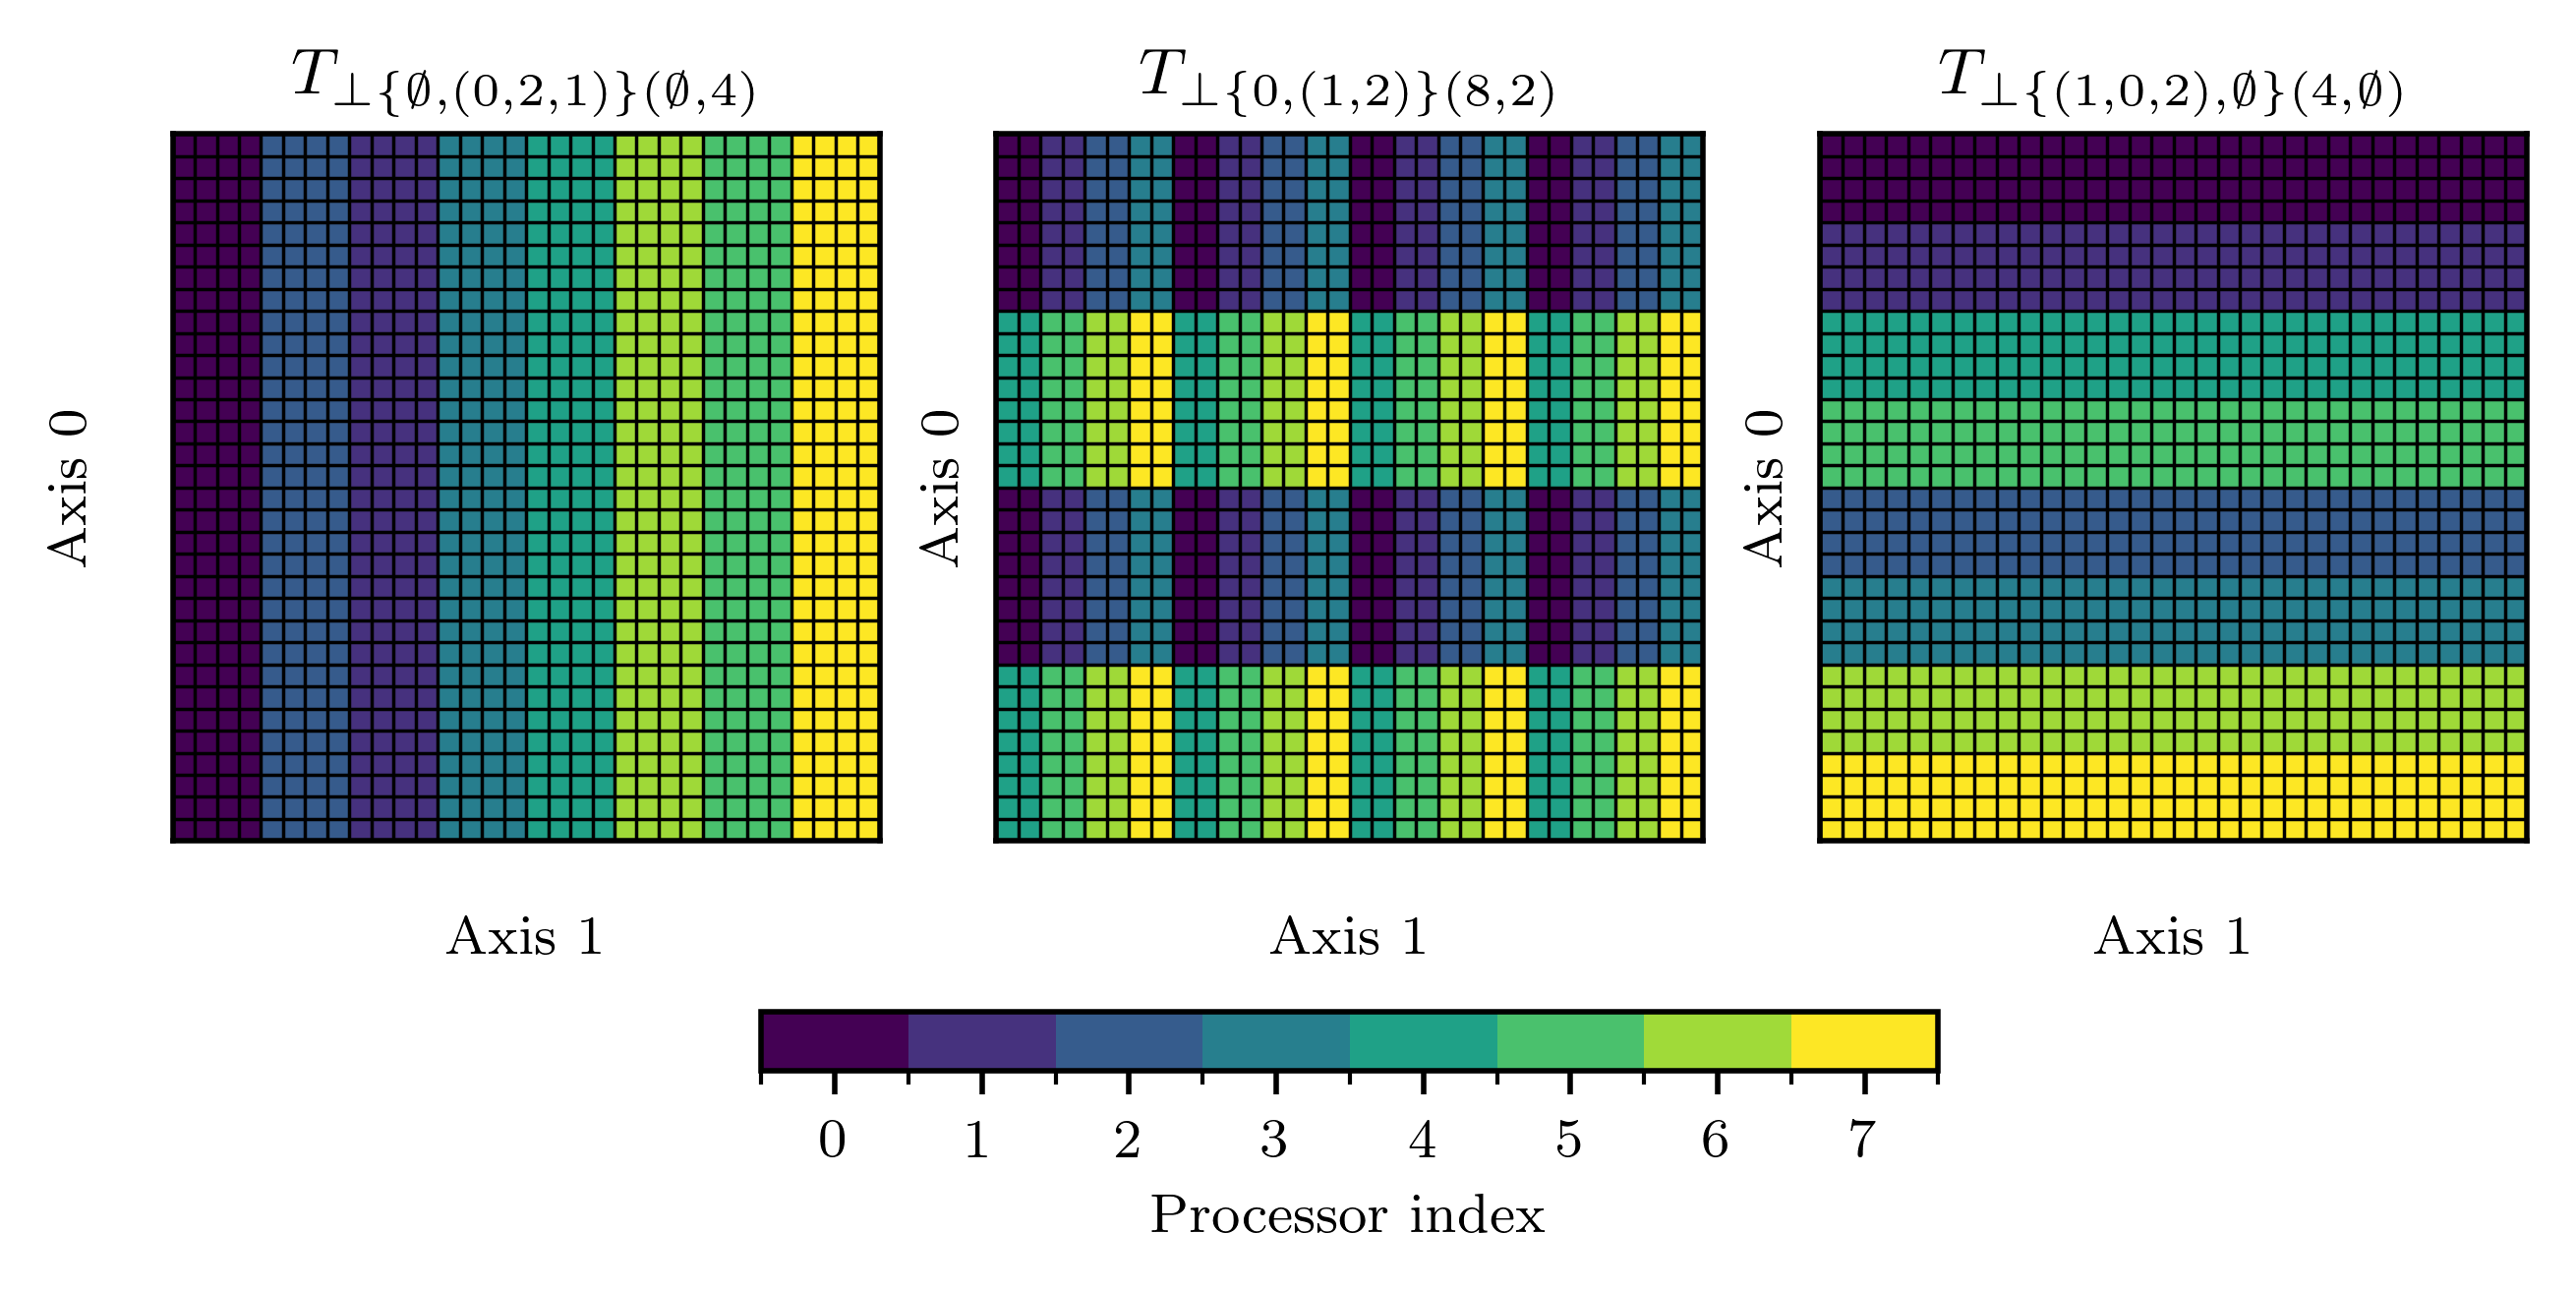

In [ ]:
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=1, ratio=2)
fig = plt.figure(figsize=figSize,layout='constrained')
grid = fig.add_gridspec(1, 3)
axs = grid.subplots(
    sharey=True,
)

new_dist, comm_vol, n_procs = dist.alltoall(tensor_shape, 0, 1)
print(new_dist)
tc.viz.draw_2d_tensor(axs[0], tensor_shape, new_dist, )
axs[0].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.alltoall(tensor_shape, 0, 1, minor=True)
print(new_dist)
tc.viz.draw_2d_tensor(axs[1], tensor_shape, new_dist, )
axs[1].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.alltoall(tensor_shape, 1, 0)
print(new_dist)
tc.viz.draw_2d_tensor(axs[2], tensor_shape, new_dist, )
axs[2].set_title(new_dist.latexStr())

tc.viz.draw_color_bar(fig, axs, tc.viz.get_n_colors(dist.numProcessors), orientation="horizontal", shrink=0.5)
# plt.savefig("plots/alltoall_example_end.pdf")

## Permute

D_[2,2,2]⊥{∅,(0,1,2)}(∅,3)


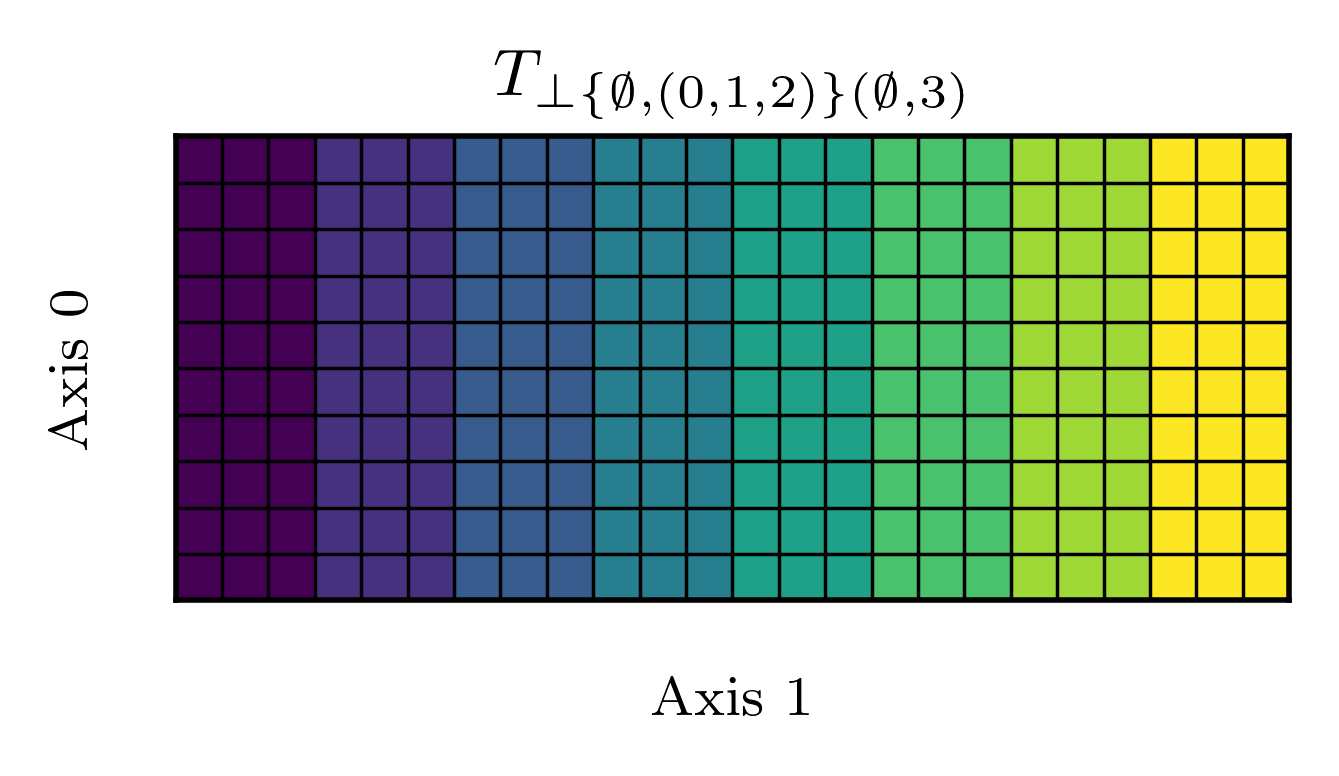

In [ ]:
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1.75)
fig = plt.figure(figsize=figSize,layout='constrained')
axs = fig.add_subplot(111)

tensor_shape = torch.Size([10, 24])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((),(0,1,2)), 3)
print(dist)
axs.set_title(dist.latexStr())

tc.viz.draw_2d_tensor(axs, tensor_shape, dist, )
# plt.savefig("plots/permute_example_start.pdf")

D_[2,2,2]⊥{∅,(1,0,2)}(∅,3)
D_[2,2,2]⊥{∅,(2,1,0)}(∅,3)
D_[2,2,2]⊥{∅,(0,2,1)}(∅,3)


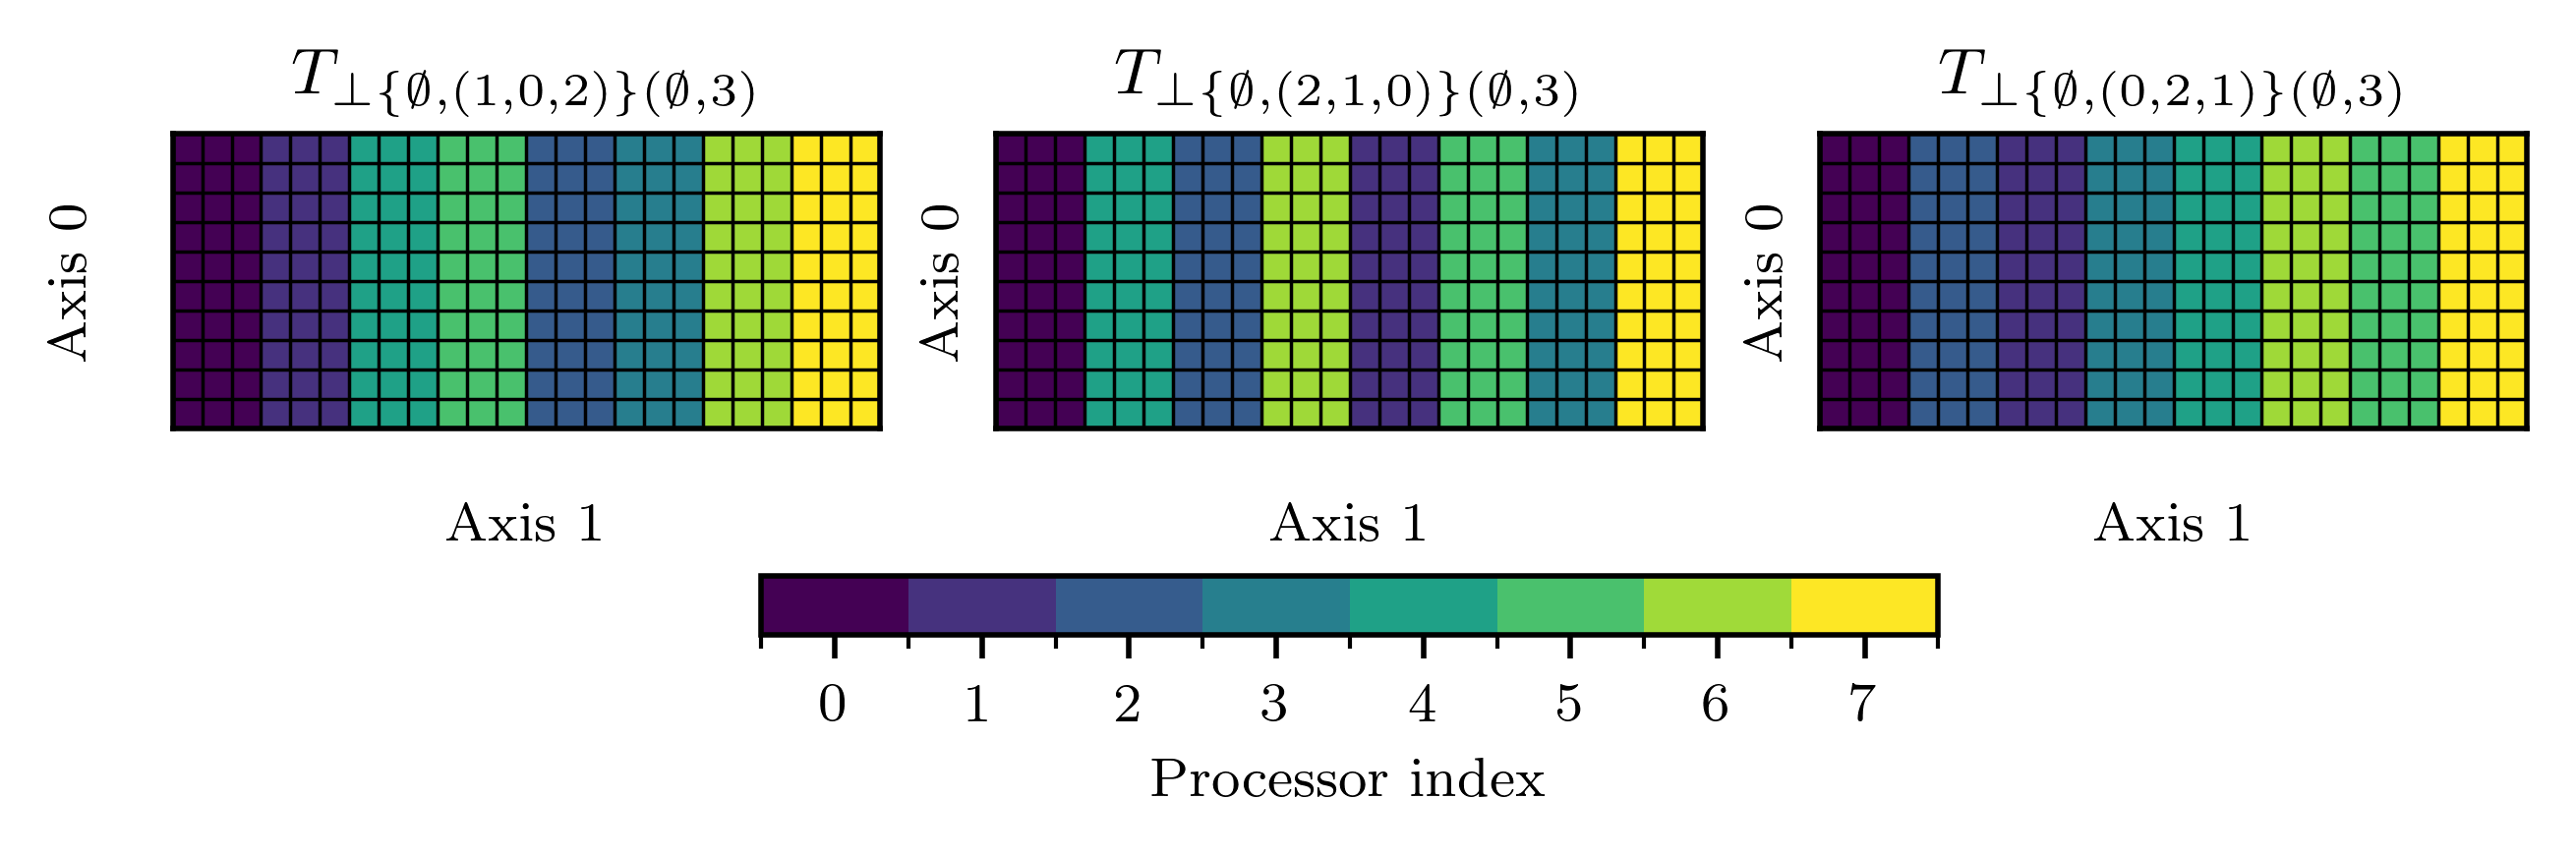

In [ ]:
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=1, ratio=3)
fig = plt.figure(figsize=figSize, layout='constrained')
grid = fig.add_gridspec(1, 3)
axs = grid.subplots(
    sharey=True,
)

new_dist, comm_vol, n_procs = dist.permute(tensor_shape, (0, 1))
print(new_dist)
tc.viz.draw_2d_tensor(axs[0], tensor_shape, new_dist, )
axs[0].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.permute(tensor_shape, (0,2))
print(new_dist)
tc.viz.draw_2d_tensor(axs[1], tensor_shape, new_dist, )
axs[1].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.permute(tensor_shape, (1, 2))
print(new_dist)
tc.viz.draw_2d_tensor(axs[2], tensor_shape, new_dist, )
axs[2].set_title(new_dist.latexStr())

tc.viz.draw_color_bar(fig, axs, tc.viz.get_n_colors(dist.numProcessors), orientation="horizontal", shrink=0.5)
# plt.savefig("plots/permute_example_end.pdf")


## Block change

D_[2,2]⊥{∅,(0,1)}(∅,4)


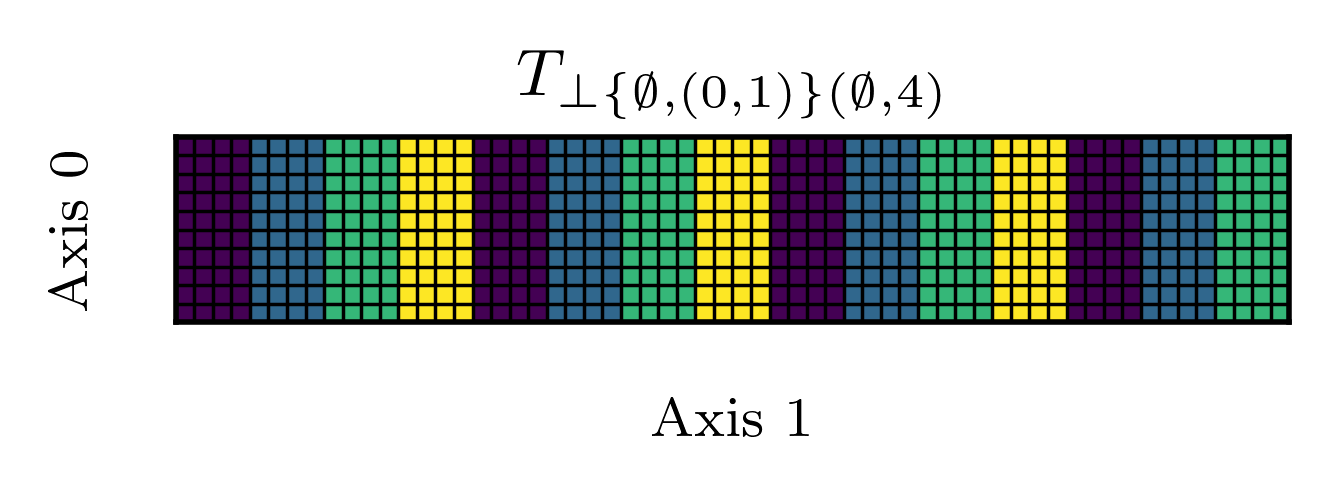

In [ ]:
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=2)
fig = plt.figure(figsize=figSize,layout='constrained')
axs = fig.add_subplot(111)

tensor_shape = torch.Size([10, 60])
mesh = torch.Size([2,2])
dist = tc.dist.MultiAxisDist(mesh, ((),(0,1,)), 4)
print(dist)
axs.set_title(dist.latexStr())

tc.viz.draw_2d_tensor(axs, tensor_shape, dist, )
# plt.savefig("plots/bchange_example_start.pdf")

D_[2,2]⊥{∅,(0,1)}(∅,1)
D_[2,2]⊥{∅,(0,1)}(∅,16)


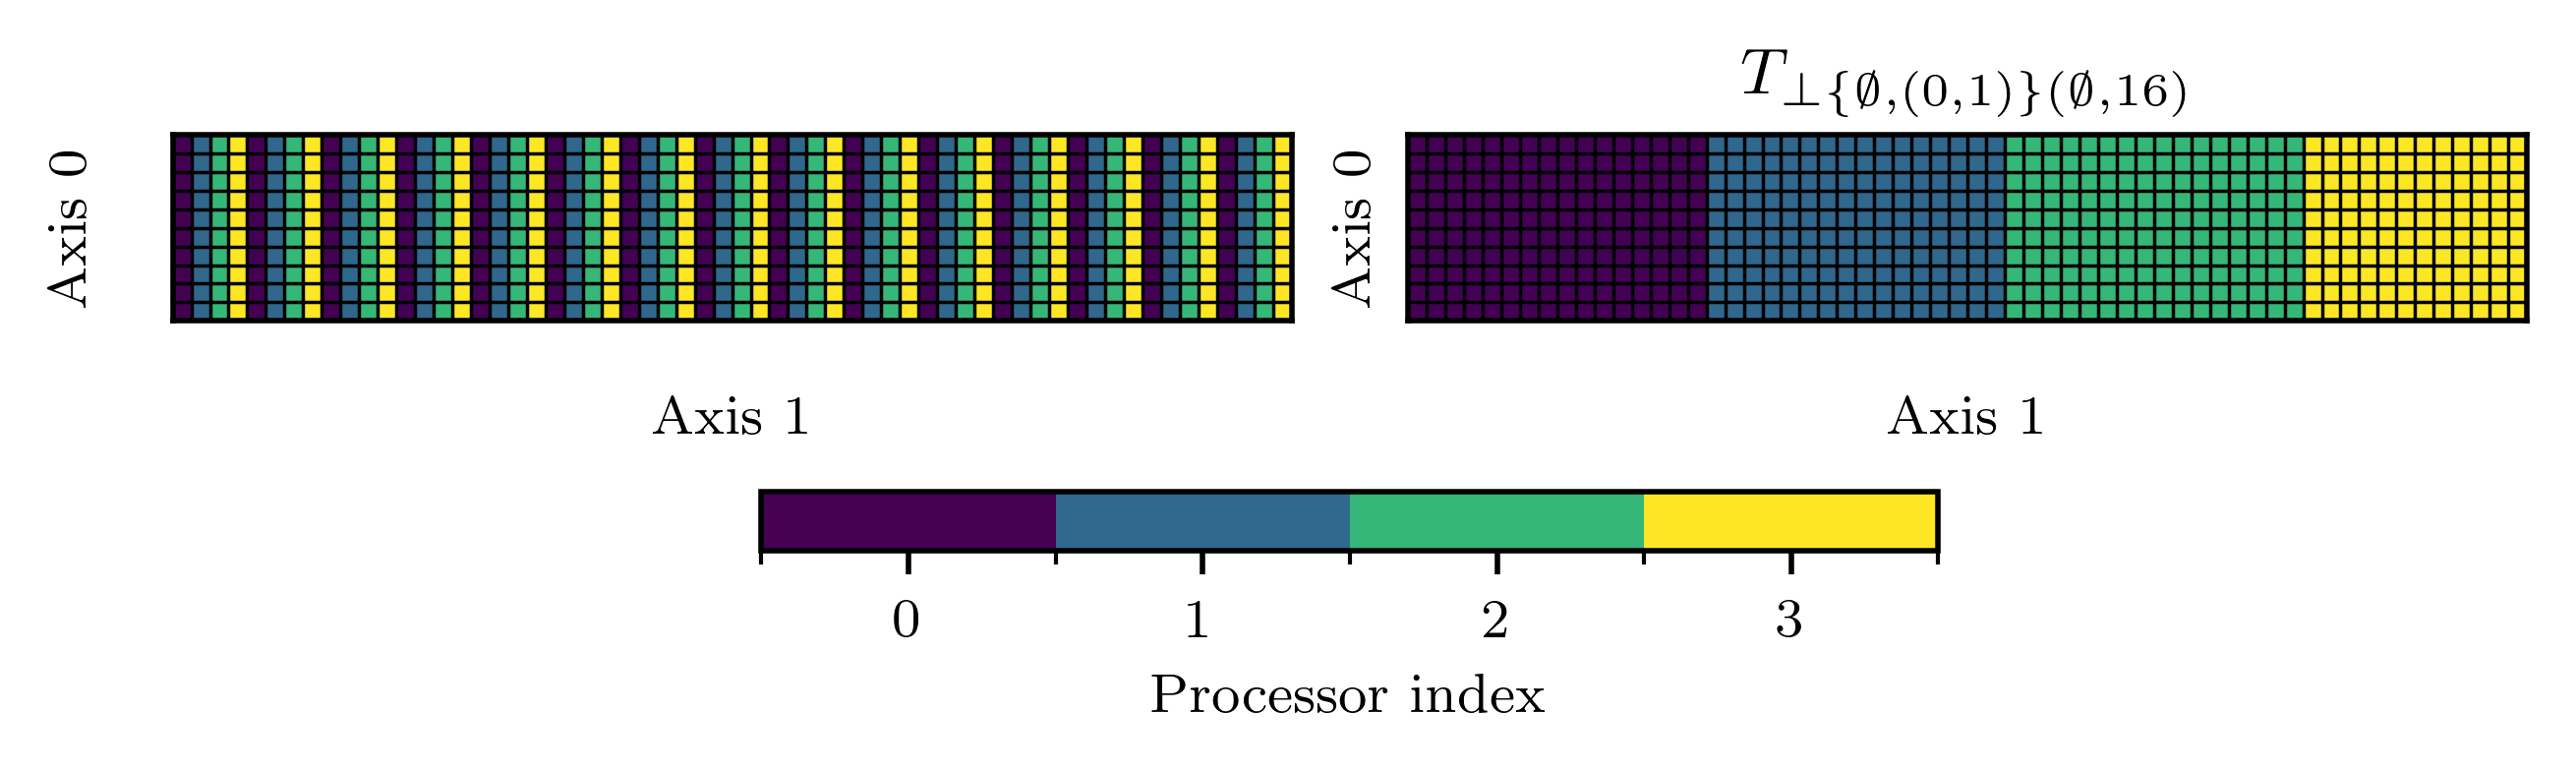

In [ ]:
figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=1, ratio=2)
fig = plt.figure(figsize=figSize, layout='constrained')
grid = fig.add_gridspec(1, 2)
axs = grid.subplots(
    sharey=True,
)

new_dist, comm_vol, n_procs = dist.change_block_size(tensor_shape, 1,1)
print(new_dist)
tc.viz.draw_2d_tensor(axs[0], tensor_shape, new_dist, )
axs[1].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.change_block_size(tensor_shape, 1,16)
print(new_dist)
tc.viz.draw_2d_tensor(axs[1], tensor_shape, new_dist, )
axs[1].set_title(new_dist.latexStr())

# new_dist, comm_vol, n_procs = dist.change_block_size(tensor_shape, 1,8)
# print(new_dist)
# tc.viz.draw_2d_tensor(axs[1][0], tensor_shape, new_dist, )
# axs[1][0].set_title(new_dist.latexStr())

# axs[1][1].axis('off')

tc.viz.draw_color_bar(fig, axs, tc.viz.get_n_colors(dist.numProcessors), orientation="horizontal", shrink=0.5)
# plt.savefig("plots/bchange_example_end.pdf")
